# **Early Detection: Machine Learning for Breast Cancer Prediction**

# Group No: 06

**Members:**

1.  **Ahamadh F.S.T.F - EG/2020/3806**
2.  **Hanan Ahamed M.R - EG/2020/3949**





In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [7]:
# Load the dataset
data = pd.read_csv(r'data.csv')
breast_cancer_dataset = data.copy()

In [5]:
# check first 5 dataset
breast_cancer_dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Drop unnecessary columns
breast_cancer_dataset.drop('id', axis=1, inplace=True)
breast_cancer_dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
# Display basic information about the dataset
print("Shape of the dataset:", breast_cancer_dataset.shape)
print("Info about the dataset:")
breast_cancer_dataset.info()


Shape of the dataset: (569, 31)
Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se            

In [8]:
print("Descriptive statistics:")
breast_cancer_dataset.describe()


Descriptive statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#check null value dataset
breast_cancer_dataset.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#check duplication of dataset
breast_cancer_dataset.duplicated().sum()


0

In [11]:
#check target variable 'diagnosis' information
print(breast_cancer_dataset["diagnosis"].value_counts(ascending=True),'\n\n')
breast_cancer_dataset.groupby("diagnosis").max()

M    212
B    357
Name: diagnosis, dtype: int64 




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,17.85,33.81,114.6,992.1,0.1634,0.2239,0.4108,0.08534,0.2743,0.09575,...,19.82,41.78,127.1,1210.0,0.2006,0.5849,1.252,0.175,0.4228,0.1486
M,28.11,39.28,188.5,2501.0,0.1447,0.3454,0.4268,0.20120,0.3040,0.09744,...,36.04,49.54,251.2,4254.0,0.2226,1.0580,1.170,0.291,0.6638,0.2075


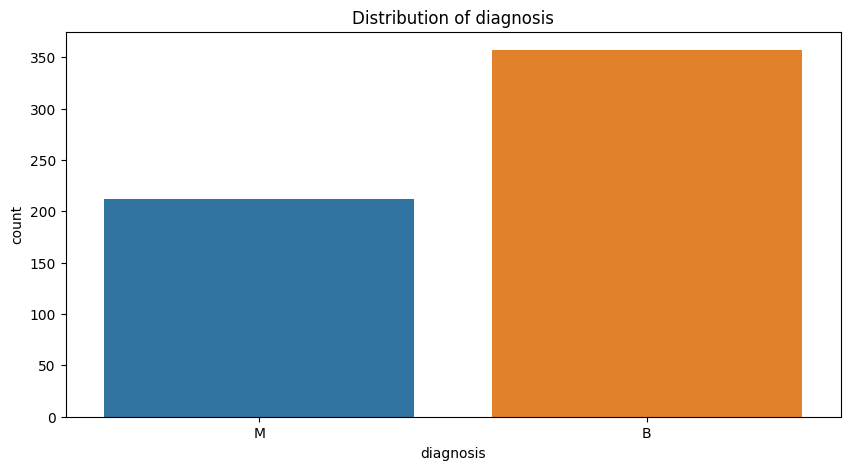

In [12]:
# Visualize the distribution of the target variable 'diagnosis'
plt.figure(figsize=(10, 5))
sns.countplot(x=breast_cancer_dataset['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()

<ipython-input-13-14df36eeda1f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(breast_cancer_dataset[feature], hist=True, kde=True,
<ipython-input-13-14df36eeda1f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(breast_cancer_dataset[feature], hist=True, kde=True,
<ipython-input-13-14df36eeda

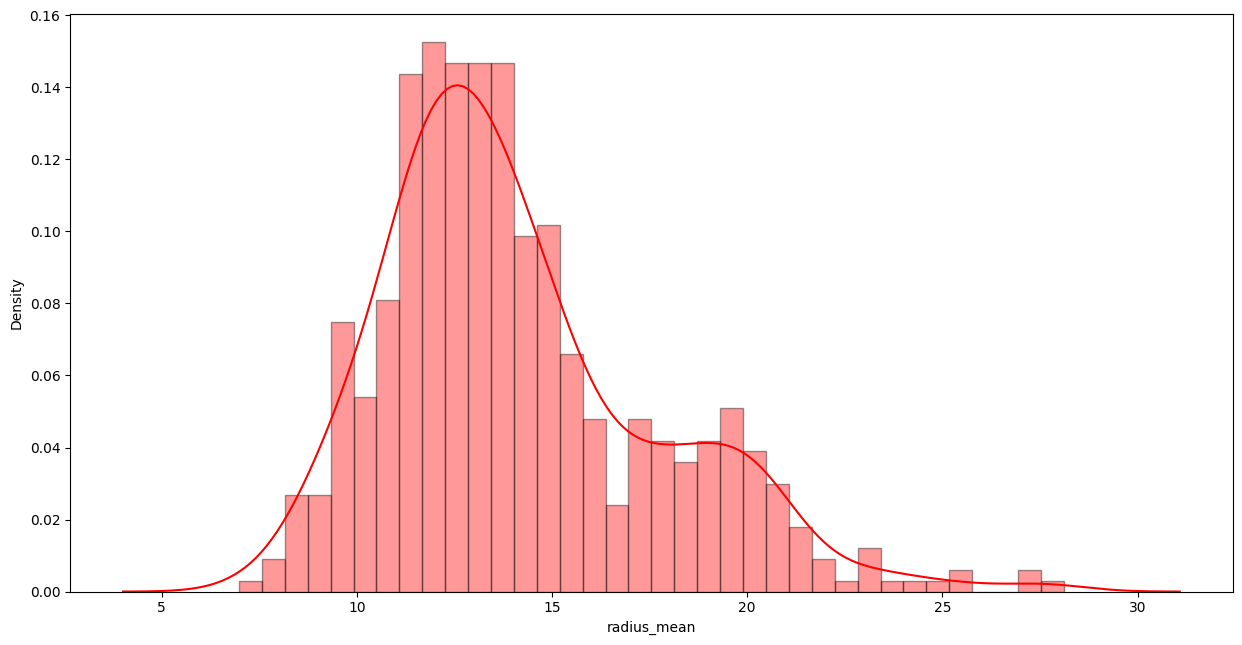

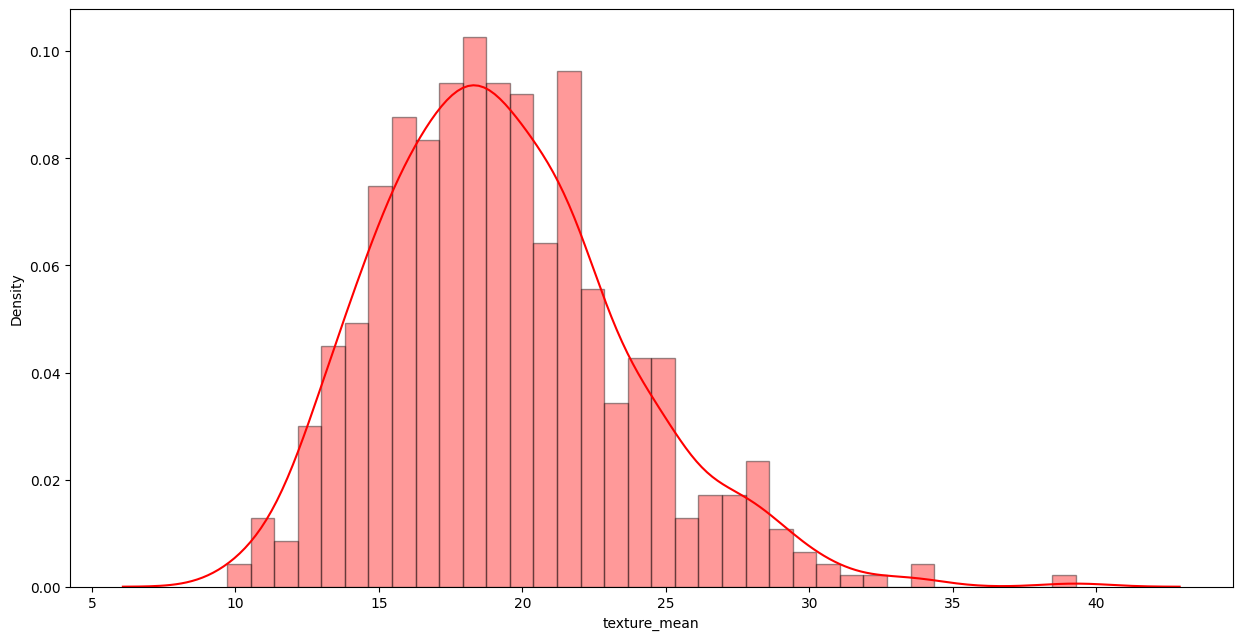

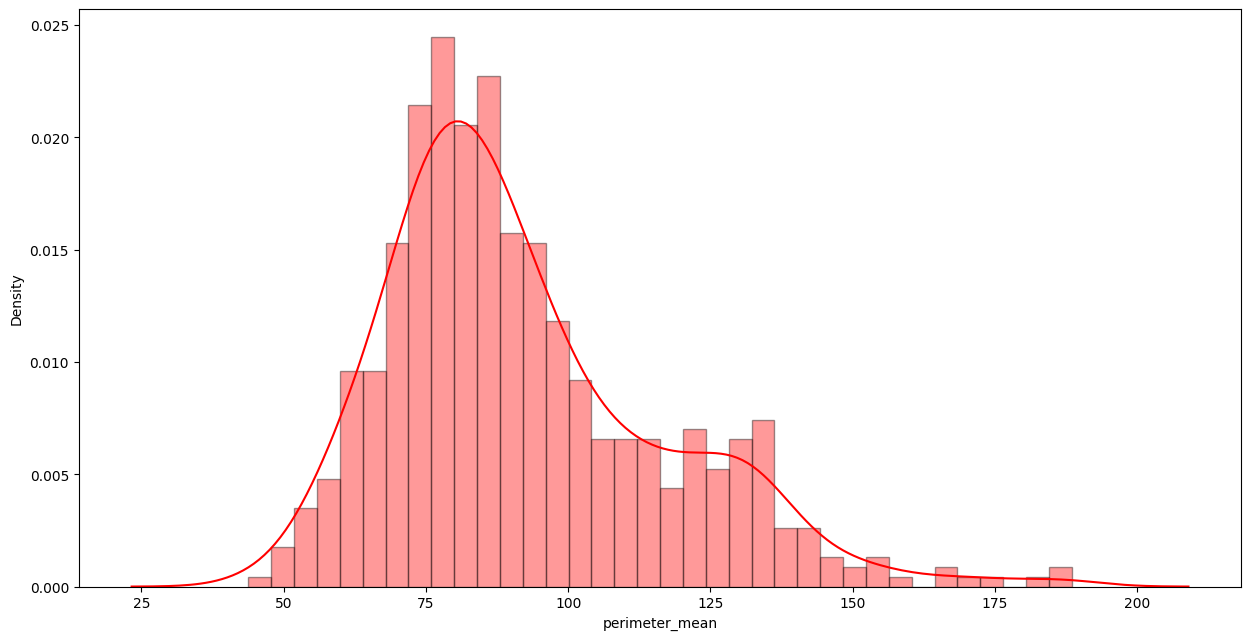

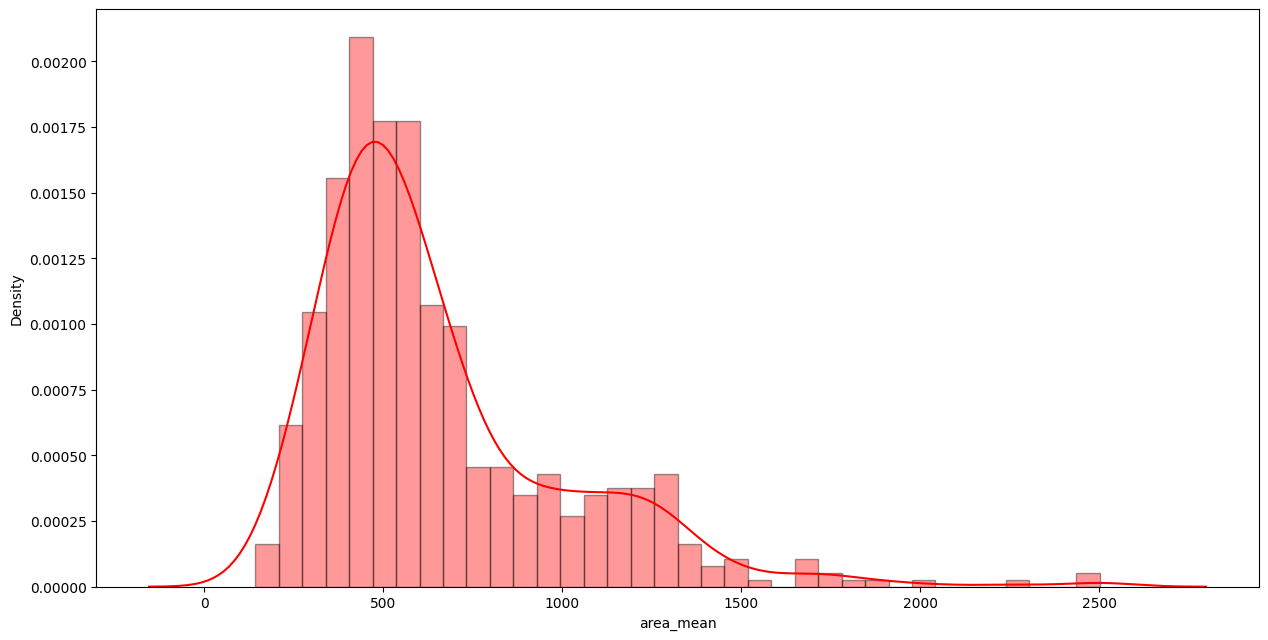

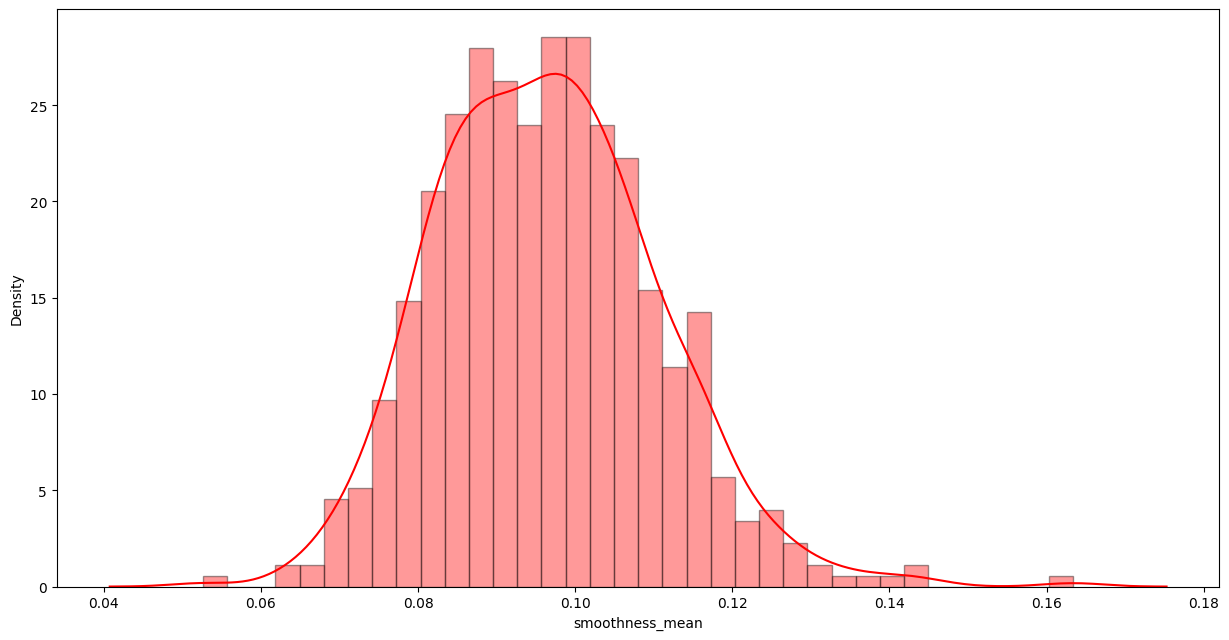

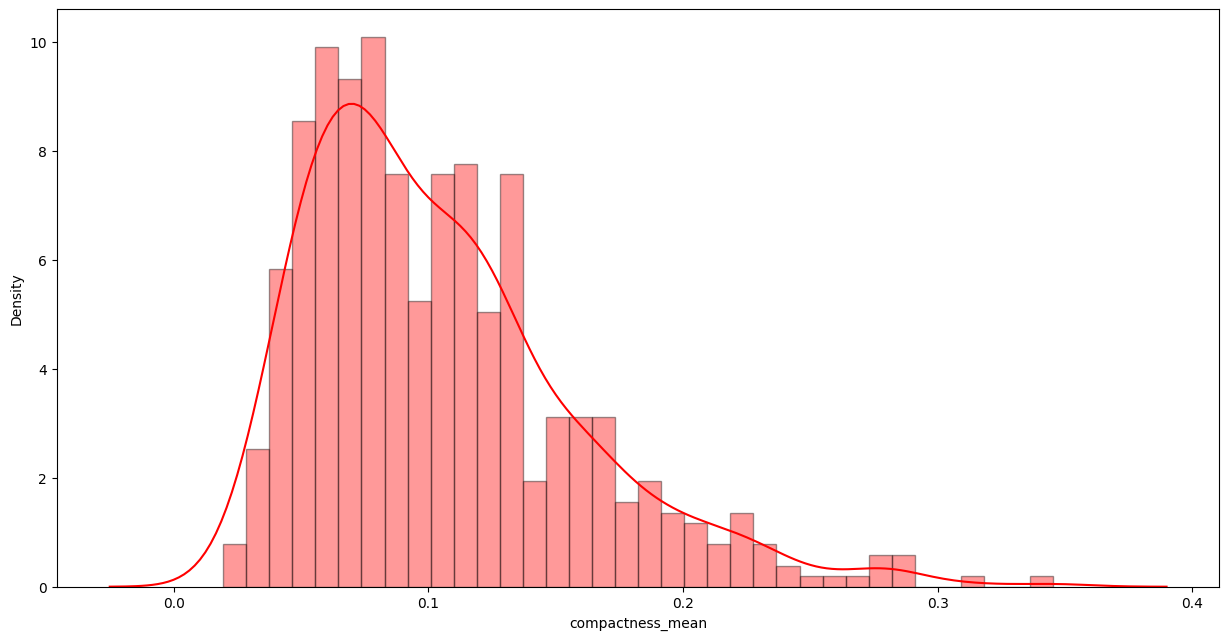

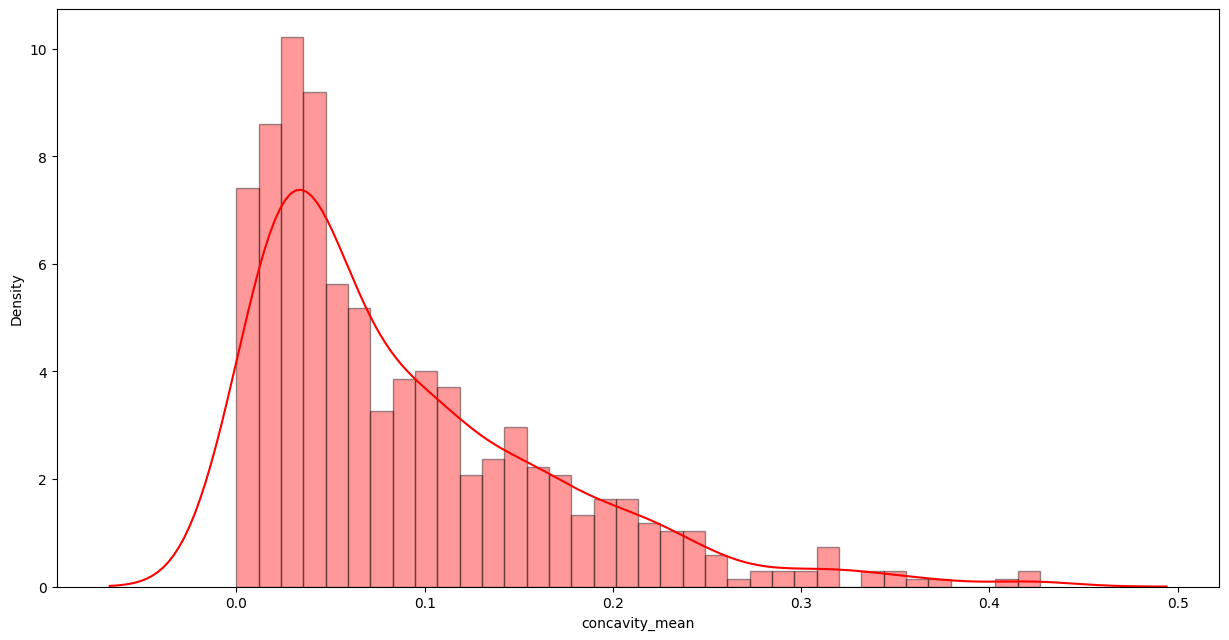

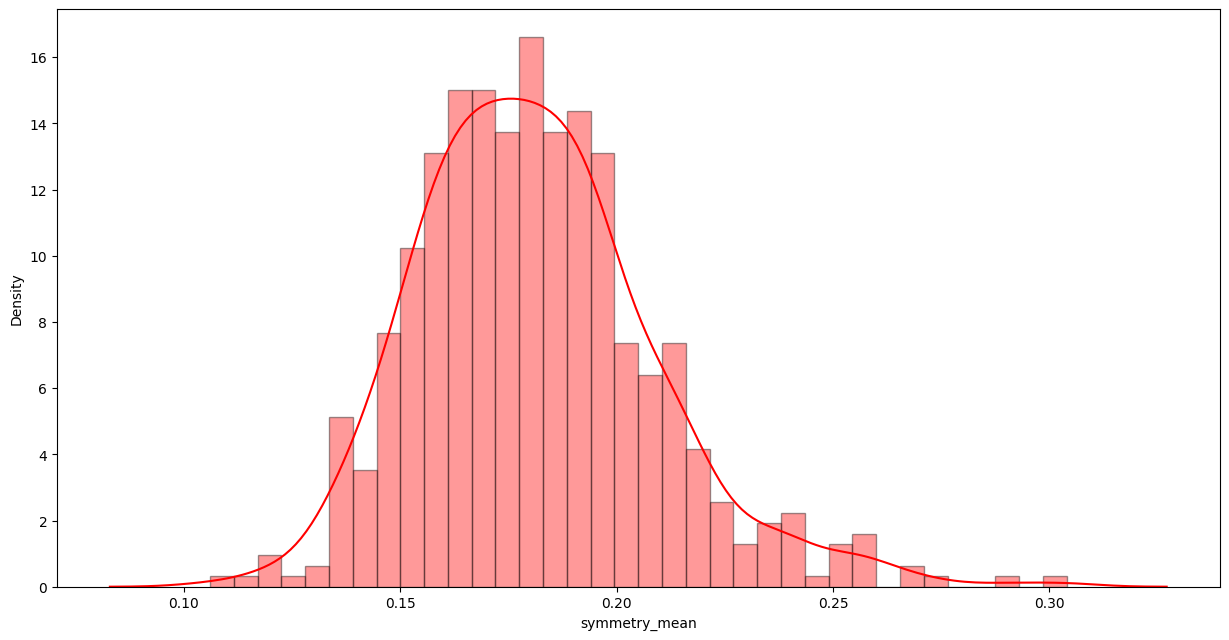

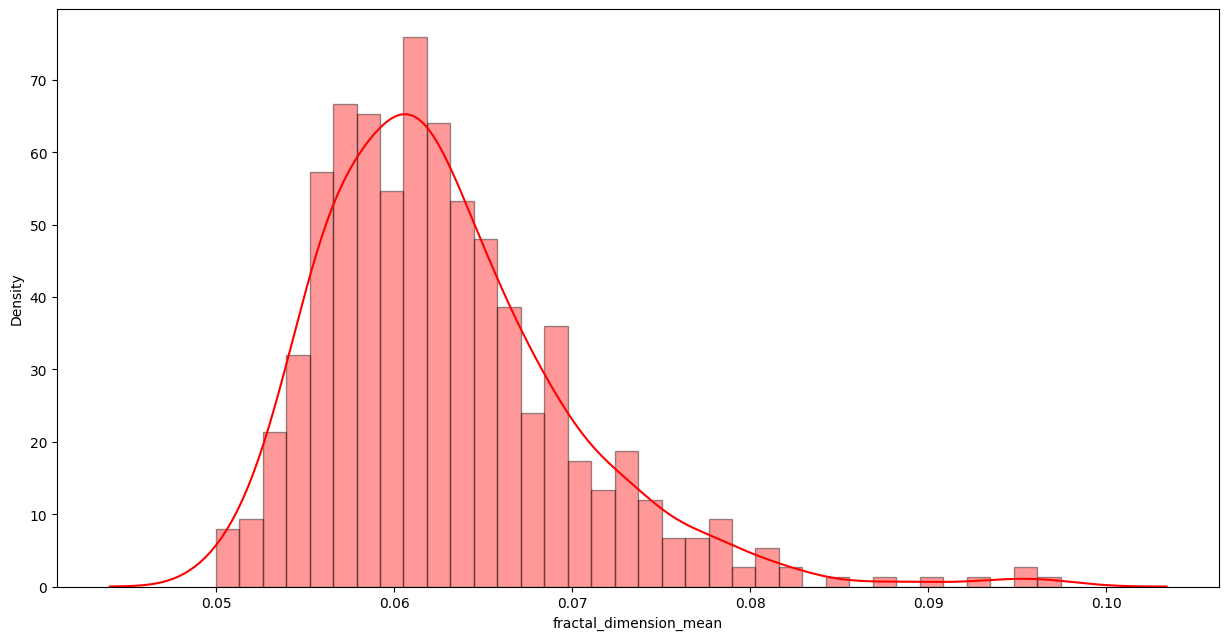

In [13]:
# Visualize the distribution of features with respect to the mean
mean_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                 "compactness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean"]

for feature in mean_features:
    plt.figure(figsize=(15, 7.5))
    sns.distplot(breast_cancer_dataset[feature], hist=True, kde=True,
                 bins=int(180/5), color='red',
                 hist_kws={'edgecolor': 'black'})

In [14]:
# Encode the target variable 'diagnosis' using LabelEncoder
new_data_set = breast_cancer_dataset.copy()
le = LabelEncoder()
le.fit(new_data_set['diagnosis'])
new_data_set['Encoder_diagnosis'] = le.transform(new_data_set['diagnosis'])
new_data_set = new_data_set.drop('diagnosis', axis=1)


<Axes: >

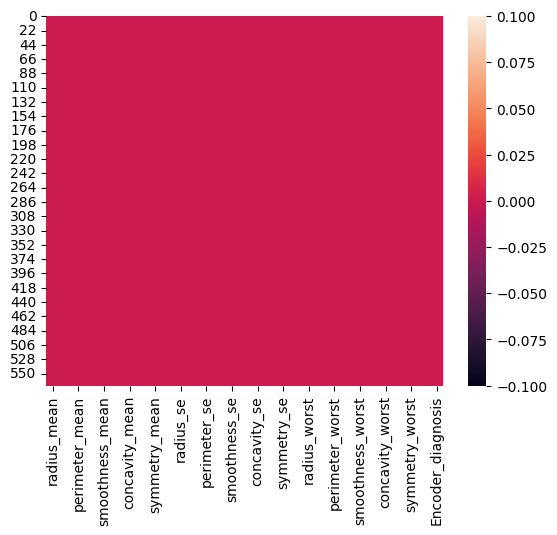

In [15]:
# Convert the dataset to float and handle/check any remaining missing values
new_data_set = new_data_set.astype(float)
sns.heatmap(data=new_data_set.isnull())

<Axes: >

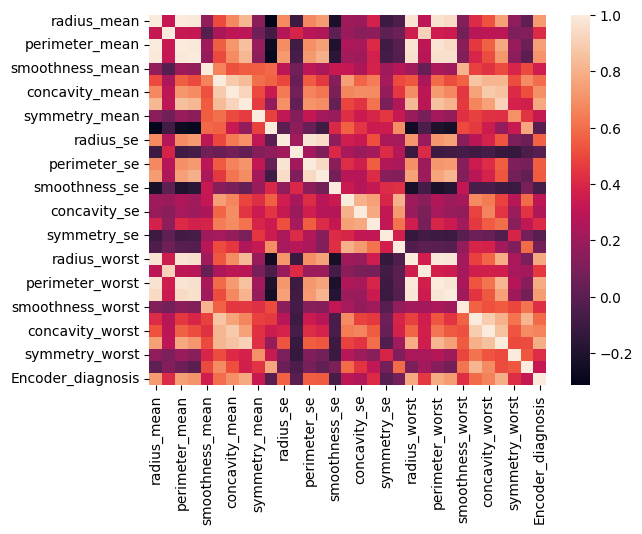

In [16]:
# Calculate and visualize the correlation matrix
Corr = new_data_set.corr()
sns.heatmap(data=Corr)


In [17]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
columns = new_data_set.columns
new_data_set = pd.DataFrame(scaler.fit_transform(new_data_set))
new_data_set.columns = columns
new_data_set.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Encoder_diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0


In [18]:
# Prepare the input features (x) and target variable (y)
x = new_data_set[new_data_set.columns[:-1]]
y = new_data_set['Encoder_diagnosis']


In [19]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [20]:
# Train a Logistic Regression model and evaluate its performance
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
model_train_acc = round(accuracy_score(y_train, model.predict(x_train)) * 100, 2)
model_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

Test data Accuracy =  97.66  %
Train data Accuracy =  96.73  %


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

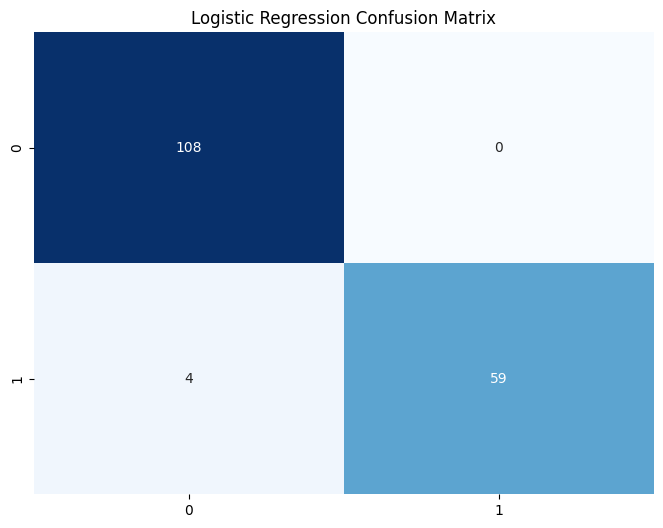

In [22]:
# Display the results for Logistic Regression
%matplotlib inline
plt.subplots(figsize=(8, 6))
print('Test data Accuracy = ', model_test_acc, ' %')
print('Train data Accuracy = ', model_train_acc, ' %')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regression Confusion Matrix')

In [23]:
# Train a Decision Tree model and evaluate its performance
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_tree_pred = tree_model.predict(x_test)
cm_tree = confusion_matrix(y_test, y_tree_pred, labels=[0, 1])
tree_model_train_acc = round(accuracy_score(y_train, tree_model.predict(x_train)) * 100, 2)
tree_model_test_acc = round(accuracy_score(y_test, y_tree_pred) * 100, 2)

Test data Accuracy =  92.98  %
Train data Accuracy =  100.0  %


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

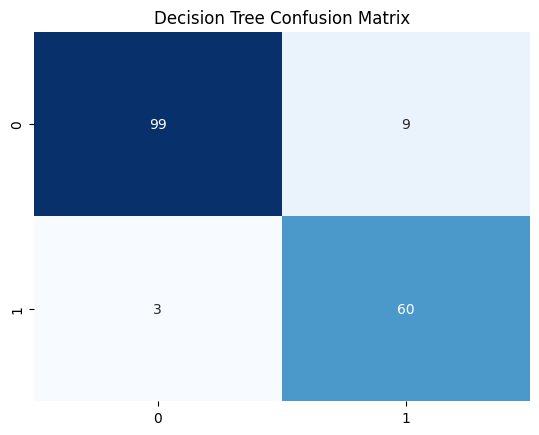

In [24]:
# Display the results for Decision Tree
print('Test data Accuracy = ', tree_model_test_acc, ' %')
print('Train data Accuracy = ', tree_model_train_acc, ' %')
sns.heatmap(cm_tree, annot=True, cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')

In [25]:
# Compare the performance of Logistic Regression and Decision Tree
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Training Accuracy': [model_train_acc, tree_model_train_acc],
    'Model Accuracy Score': [model_test_acc, tree_model_test_acc]
})

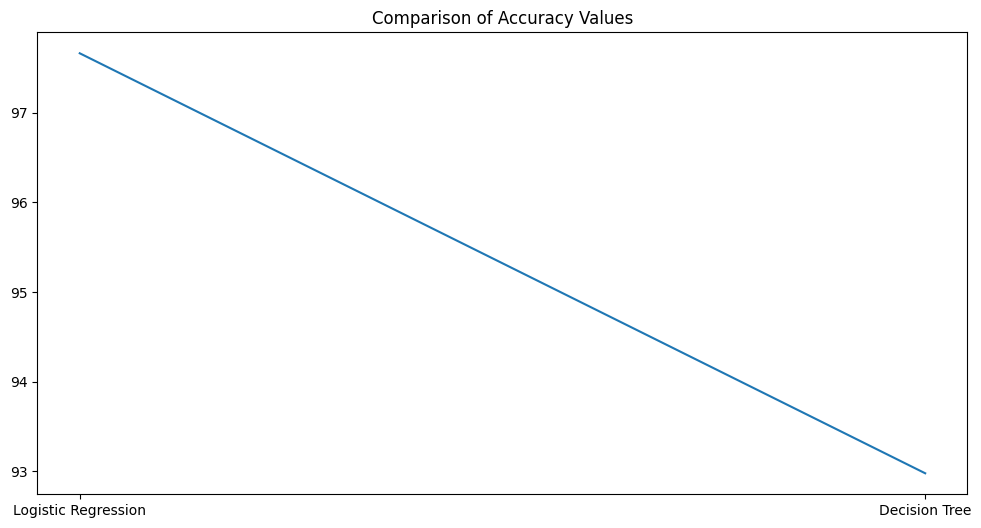

In [26]:
# Display a comparison plot
plt.figure(figsize=(12, 6))
plt.plot(models['Model'], models['Model Accuracy Score'])
plt.title("Comparison of Accuracy Values")
plt.show()

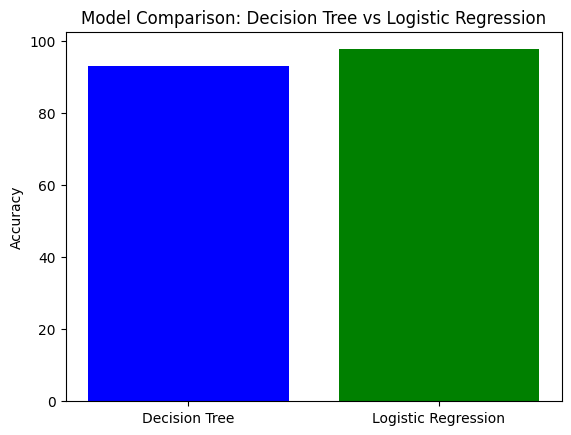

In [27]:
# Display a bar plot comparing model accuracies
model_names = ['Decision Tree', 'Logistic Regression']
accuracies = [tree_model_test_acc, model_test_acc]

plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.title('Model Comparison: Decision Tree vs Logistic Regression')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# Print final accuracy results and determine the better-performing model
print(f'\n\nAccuracy of Decision Tree : {tree_model_test_acc:.2f}\n')
print(f'Accuracy of Logistic Regression: {model_test_acc:.2f}\n')

if model_test_acc > tree_model_test_acc:
    print('Accuracy of Logistic Regression is better than Decision Tree')
else:
    print('Accuracy of Decision Tree is better than Logistic Regression\n')




Accuracy of Decision Tree : 92.98

Accuracy of Logistic Regression: 97.66

Accuracy of Logistic Regression is better than Decision Tree
